In [1]:
import numpy as np
import scipy

# Problem 1

In [4]:
def newt(f,x0,f_der,tol,args=(),max_iter=15):
    x1=1
    i=0
    while np.abs(x1-x0)>tol and i<max_iter:
        x0=x1
        i=i+1
        x1=x1-f(x1)/f_der(x1) 
    if i<max_iter:    
        v=True
    else:
        v=False
    return x1, v, i    

import scipy.optimize as opt

f=lambda y: y**4-3
f_der=lambda y: 4*y**3    

tol=1e-6
xbar,v,n_iter=newt(f,10,f_der,tol)

print("f(xbar)= ",f(xbar))

print("xbar-scipy sol= ",xbar-opt.newton(f,10,f_der))

f(xbar)=  -8.881784197001252e-16
xbar-scipy sol=  0.0


# Problem 3

In [5]:
def newt_b(f,x0,f_der,tol,args=(),max_iter=15,alpha=1):

    i=0
    d=1
    while d>tol and i<max_iter:
        
        x1=x0-alpha*f(x0)/f_der(x0) 
        d=np.abs(x1-x0)
        x0=x1
        i=i+1
        
    if i<max_iter:    
        v=True
    else:
        v=False
    return x1, v, i   

f2=lambda x: np.sign(x)*np.power(np.abs(x),1./3)
f2_der= lambda x: np.power(np.abs(x),-2./3)*(1./3)

xbar,v,n_iter=newt_b(f2,.01,f2_der,tol)
print(v)
print(n_iter)
print(xbar)
print(f(xbar))

xbar,v,n_iter=newt_b(f2,.01,f2_der,tol,alpha=.4)
print(v)
print(n_iter)
print(xbar)
print(f(xbar))


False
15
-327.68
11529215043.1
True
7
-1.28e-07
-3.0


# Problem 4

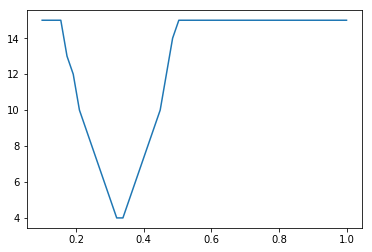

In [13]:
from matplotlib import pyplot as plt

alp=np.linspace(.1,1,50)
ITER=np.zeros(50)
for i in range(50):
    xbar,v,ITER[i]=newt_b(f2,.01,f2_der,tol,alpha=alp[i])
plt.figure(1)
plt.plot(alp,ITER)
plt.show()


# Problem 7

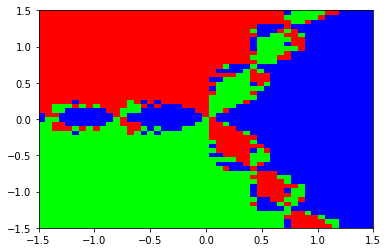

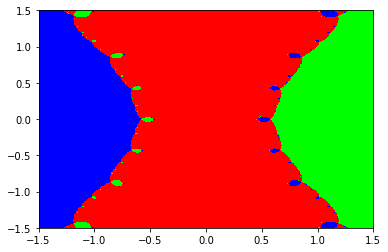

In [20]:
def f_prob7(f,f_der,zeros,bounds,res,iters):
    grid_re=np.linspace(bounds[0],bounds[1],res)
    grid_im=np.linspace(bounds[2],bounds[3],res)
    tol=1e-5
    X=np.zeros((res,res),dtype=complex)
    Y=np.zeros((res,res))
    y=np.zeros((res,res),dtype=complex)
    for i in range(res):
        for j in range(res):
            X[i,j]=complex(grid_re[i],grid_im[j])
            y[i,j]=newt_b(f,X[i,j],f_der,tol,iters)[0]
            Y[i,j]=np.argmin(np.abs(zeros-y[i,j]))
            
    plt.pcolormesh(grid_re,grid_im,Y.transpose(),cmap="brg")   
    plt.show
    
f=lambda y: y**3-1
f_der=lambda y: 3*y**2    
zeros=np.array([1,-.5+(np.sqrt(3)/2)*1j,-.5-(np.sqrt(3)/2)*1j])
bounds=np.array([-1.5,1.5,-1.5,1.5])
res=50
iters=10
plt.figure(2)
f_prob7(f,f_der,zeros,bounds,res,iters)

f=lambda y: y**3-y
f_der=lambda y: 3*y**2 -1
zeros=np.array([-1,0,1],dtype=complex)
bounds=np.array([-1.5,1.5,-1.5,1.5])
res=500
iters=100
plt.figure(3)
f_prob7(f,f_der,zeros,bounds,res,iters)
plt.show()